1. DSA데이터에서 

lyingRigh                  480

lyingBack                  480
을 정상 (normal) jumping(abnormal)을 비정상 데이터로 사용

2. 두개 (lying+jumping) activity를 섞어서 test 

3. lying만 가지고 훈련하여 AE 구축

4. 테스트 데이터(lying+jumping)AE에 넣어서 Reconstruction error(입력/출력차이)를 구함

5. 적당한 threshold값으로 분류수행

6. accuracy를 구함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("C:\datasets/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
df.shape

(9120, 272)

In [4]:
# 각 열의 결측치 수 확인
print(df.isnull().sum())

T_xacc_mean     0
T_xacc_max      0
T_xacc_min      0
T_xacc_var      0
T_xacc_std      0
               ..
LL_zmag_var     0
LL_zmag_std     0
LL_zmag_skew    0
activity        0
people          0
Length: 272, dtype: int64


In [5]:
# 결측치가 있는 모든 행 출력
df[df.isnull().any(axis=1)]

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people


In [6]:
df_clean = df.dropna()

In [5]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [6]:
df['activity'].value_counts()

sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: activity, dtype: int64

## lyingRigh lyingBack 합치기

In [7]:
# lyingRigh과 lyingBack을 lying으로 변환
df['activity'] = df['activity'].replace({'lyingRigh': 'lying', 'lyingBack': 'lying'})

In [8]:
print(df['activity'].value_counts())

lying                      960
sitting                    480
runningTreadmill           480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
walkingTreadmillIncline    480
standing                   480
walkingTreadmillFlat       480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
basketBall                 480
Name: activity, dtype: int64


In [9]:
df_filtered = df[df['activity'].isin(['jumping', 'lying'])]
df_filtered = df_filtered.drop('people', axis = 1)
df_filtered

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301,lying
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381,lying
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587,lying
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321,lying
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271,lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,9.298029,32.4980,-6.0782,134.634624,11.603216,0.570723,-2.592341,1.73230,-12.91800,9.207424,...,9.303061e-04,0.030501,0.334449,0.625187,0.69130,0.57187,9.188517e-04,0.030313,0.274486,jumping
8636,8.738784,34.0480,-6.7822,145.225186,12.050941,0.760224,-2.417799,1.19030,-10.90200,9.233904,...,9.968638e-04,0.031573,0.396417,0.624749,0.69356,0.57040,9.632708e-04,0.031037,0.433661,jumping
8637,9.404261,34.8670,-5.3331,130.142955,11.408022,0.560963,-2.408945,0.81347,-8.21750,6.635468,...,9.194098e-04,0.030322,0.524964,0.631822,0.69012,0.58197,8.933477e-04,0.029889,0.335023,jumping
8638,9.139112,32.5060,-6.8835,135.812815,11.653876,0.589304,-2.359531,1.32350,-9.57930,7.510565,...,5.788992e-04,0.024060,0.301200,0.624196,0.68856,0.57362,1.025797e-03,0.032028,0.272121,jumping


In [10]:
df_filtered['activity'].value_counts()

lying      960
jumping    480
Name: activity, dtype: int64

In [11]:
df_filtered.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_var', 'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean',
       'LL_zmag_max', 'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std',
       'LL_zmag_skew', 'activity'],
      dtype='object', length=271)

In [12]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_filtered['activity'] = label_encoder.fit_transform(df_filtered['activity'])

df_filtered

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301,1
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381,1
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587,1
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321,1
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,9.298029,32.4980,-6.0782,134.634624,11.603216,0.570723,-2.592341,1.73230,-12.91800,9.207424,...,9.303061e-04,0.030501,0.334449,0.625187,0.69130,0.57187,9.188517e-04,0.030313,0.274486,0
8636,8.738784,34.0480,-6.7822,145.225186,12.050941,0.760224,-2.417799,1.19030,-10.90200,9.233904,...,9.968638e-04,0.031573,0.396417,0.624749,0.69356,0.57040,9.632708e-04,0.031037,0.433661,0
8637,9.404261,34.8670,-5.3331,130.142955,11.408022,0.560963,-2.408945,0.81347,-8.21750,6.635468,...,9.194098e-04,0.030322,0.524964,0.631822,0.69012,0.58197,8.933477e-04,0.029889,0.335023,0
8638,9.139112,32.5060,-6.8835,135.812815,11.653876,0.589304,-2.359531,1.32350,-9.57930,7.510565,...,5.788992e-04,0.024060,0.301200,0.624196,0.68856,0.57362,1.025797e-03,0.032028,0.272121,0


## Normal Abnormal 분류

In [13]:
LABELS = ["Normal", "Abnormal"]

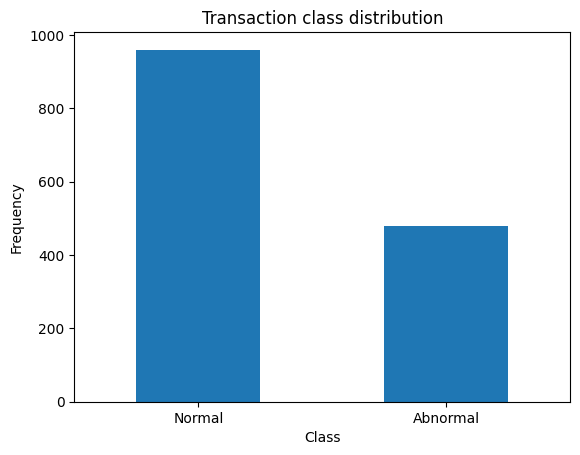

In [14]:
count_classes = df_filtered.value_counts(df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [15]:
frauds = df_filtered[df_filtered.activity == 0]
normal = df_filtered[df_filtered.activity == 1]
frauds.shape

(480, 271)

In [16]:
normal.shape

(960, 271)

## 두 activity(lying, jumping) 섞어서 training, test 분류

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_filtered, test_size=0.2, random_state=20)

X_train.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
1211,-3.787358,-3.6666,-3.9128,0.002635,0.051336,-0.350272,-0.586645,-0.52740,-0.66070,0.000476,...,5.865990e-07,0.000766,0.382553,0.631086,0.63336,0.62910,5.074985e-07,0.000712,0.088324,1
1494,2.435999,2.5032,2.3681,0.000666,0.025798,-0.227335,-7.529440,-7.42110,-7.65000,0.001778,...,4.727268e-07,0.000688,-0.165635,-0.373849,-0.37204,-0.37565,5.001497e-07,0.000707,-0.207137,1
1603,4.314956,4.3991,4.2349,0.000904,0.030060,-0.115825,-8.675726,-8.58090,-8.78830,0.001018,...,7.373344e-07,0.000859,-0.440165,-0.525259,-0.52301,-0.52782,1.448505e-06,0.001204,-0.218640,1
1215,-3.876310,-3.7489,-3.9875,0.002662,0.051592,0.608350,-0.551745,-0.46725,-0.64575,0.000845,...,4.857883e-07,0.000697,0.082178,0.631350,0.63333,0.62947,5.223330e-07,0.000723,0.275218,1
8459,9.323498,49.3310,-11.3930,261.333462,16.165812,0.999304,-0.648202,1.11210,-3.97380,1.239900,...,2.505673e-03,0.050057,-0.032648,0.292058,0.32000,0.25727,2.342069e-04,0.015304,-0.194460,0


## 정상 데이터로만 훈련

In [18]:
X_train = X_train[X_train.activity == 1]

y_train = X_train['activity']
y_test = X_test['activity']

X_train = X_train.drop(['activity'], axis=1)
X_test = X_test.drop(['activity'], axis=1)

X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
1211,-3.787358,-3.66660,-3.91280,0.002635,0.051336,-0.350272,-0.586645,-0.52740,-0.66070,0.000476,...,0.311140,5.865990e-07,0.000766,0.382553,0.631086,0.63336,0.62910,5.074985e-07,0.000712,0.088324
1494,2.435999,2.50320,2.36810,0.000666,0.025798,-0.227335,-7.529440,-7.42110,-7.65000,0.001778,...,0.553790,4.727268e-07,0.000688,-0.165635,-0.373849,-0.37204,-0.37565,5.001497e-07,0.000707,-0.207137
1603,4.314956,4.39910,4.23490,0.000904,0.030060,-0.115825,-8.675726,-8.58090,-8.78830,0.001018,...,0.812900,7.373344e-07,0.000859,-0.440165,-0.525259,-0.52301,-0.52782,1.448505e-06,0.001204,-0.218640
1215,-3.876310,-3.74890,-3.98750,0.002662,0.051592,0.608350,-0.551745,-0.46725,-0.64575,0.000845,...,0.310930,4.857883e-07,0.000697,0.082178,0.631350,0.63333,0.62947,5.223330e-07,0.000723,0.275218
1066,-2.077746,-1.99330,-2.17230,0.001209,0.034776,-0.313388,-0.469514,-0.38469,-0.66033,0.002111,...,0.755890,4.388285e-07,0.000662,-0.394638,0.315758,0.31735,0.31360,4.394426e-07,0.000663,-0.170766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0.455189,0.53668,0.38677,0.000557,0.023594,0.396152,-8.811597,-8.74440,-8.88540,0.000816,...,0.026064,4.056603e-04,0.020141,-0.910100,-0.899554,-0.89520,-0.90465,4.833275e-06,0.002198,-0.416435
1353,-4.527670,-4.41270,-4.63630,0.002407,0.049062,0.257703,1.205020,1.31570,1.10700,0.001185,...,0.968360,5.381226e-07,0.000734,0.174998,-0.118552,-0.11713,-0.12035,4.870629e-07,0.000698,-0.100890
1884,2.620093,2.65480,2.57590,0.000241,0.015515,-0.151838,-9.383774,-9.33920,-9.42720,0.000315,...,-0.550550,7.828433e-05,0.008848,-0.207086,-0.410770,-0.37837,-0.43461,7.297995e-05,0.008543,0.506998
1231,-3.835801,-3.71160,-3.95760,0.004412,0.066426,0.151410,-0.507295,-0.42530,-0.57312,0.000530,...,0.304010,6.165155e-07,0.000785,0.212013,0.635006,0.63731,0.63314,6.101636e-07,0.000781,0.004581


In [19]:
X_train.shape

(762, 270)

In [20]:
# X_train과 X_test를 넘파이 배열로 변환
X_train = X_train.values
X_test = X_test.values

X_train

array([[-3.78735760e+00, -3.66660000e+00, -3.91280000e+00, ...,
         5.07498542e-07,  7.12389319e-04,  8.83235275e-02],
       [ 2.43599920e+00,  2.50320000e+00,  2.36810000e+00, ...,
         5.00149716e-07,  7.07212639e-04, -2.07137018e-01],
       [ 4.31495600e+00,  4.39910000e+00,  4.23490000e+00, ...,
         1.44850519e-06,  1.20353861e-03, -2.18639740e-01],
       ...,
       [ 2.62009280e+00,  2.65480000e+00,  2.57590000e+00, ...,
         7.29799532e-05,  8.54283052e-03,  5.06998366e-01],
       [-3.83580080e+00, -3.71160000e+00, -3.95760000e+00, ...,
         6.10163639e-07,  7.81129720e-04,  4.58081798e-03],
       [-1.63541680e+00, -1.59540000e+00, -1.67450000e+00, ...,
         8.59172326e-05,  9.26915490e-03,  3.60259985e-01]])

In [21]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [22]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용

history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
3/3 [==============================] - 4s 312ms/step - loss: 5.6622 - val_loss: 5.7085
Epoch 2/50
3/3 [==============================] - 0s 52ms/step - loss: 5.6497 - val_loss: 5.6948
Epoch 3/50
3/3 [==============================] - 0s 54ms/step - loss: 5.6366 - val_loss: 5.6793
Epoch 4/50
3/3 [==============================] - 0s 51ms/step - loss: 5.6218 - val_loss: 5.6619
Epoch 5/50
3/3 [==============================] - 0s 52ms/step - loss: 5.6044 - val_loss: 5.6414
Epoch 6/50
3/3 [==============================] - 0s 51ms/step - loss: 5.5832 - val_loss: 5.6172
Epoch 7/50
3/3 [==============================] - 0s 52ms/step - loss: 5.5581 - val_loss: 5.5881
Epoch 8/50
3/3 [==============================] - 0s 54ms/step - loss: 5.5278 - val_loss: 5.5544
Epoch 9/50
3/3 [==============================] - 0s 56ms/step - loss: 5.4925 - val_loss: 5.5162
Epoch 10/50
3/3 [==============================] - 0s 51ms/step - loss: 5.4526 - val_loss: 5.4729
Epoch 11/50
3/3 [===========

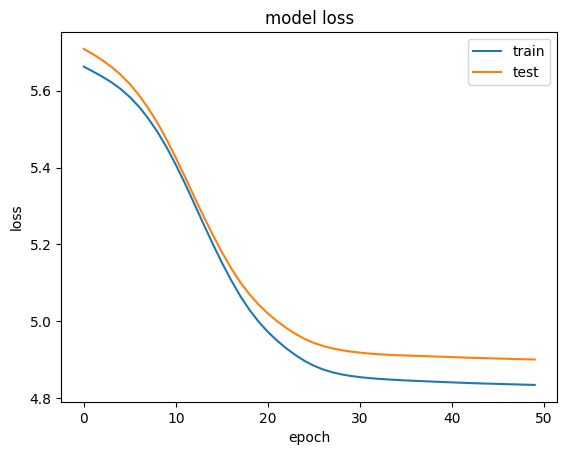

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [24]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

9/9 [==============================] - 0s 4ms/step


,reconstruction_error,true_class
count,288.000000,288.000000
mean,158.080979,0.687500
std,326.871698,0.464319
min,4.508714,0.000000
25%,4.682567,0.000000
50%,4.984532,1.000000
75%,121.308400,1.000000
max,2138.836169,1.000000


In [25]:
error_df.head()

,reconstruction_error,true_class
1587,4.977612,1
1863,4.891911,1
1711,4.909081,1
1380,4.546185,1
1281,4.606111,1


In [26]:
threshold = np.percentile(error_df['reconstruction_error'], 95)  # 95번째 백분위수

threshold

841.1925552080169

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(error_df['true_class'], error_df['reconstruction_error'])
optimal_idx = np.argmax(tpr - fpr)  # TPR - FPR이 최대가 되는 곳
optimal_threshold = thresholds[optimal_idx]

optimal_threshold

2139.8361693592456

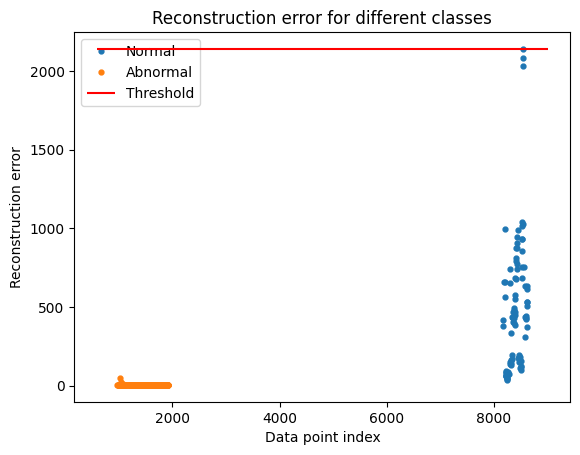

In [29]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(optimal_threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

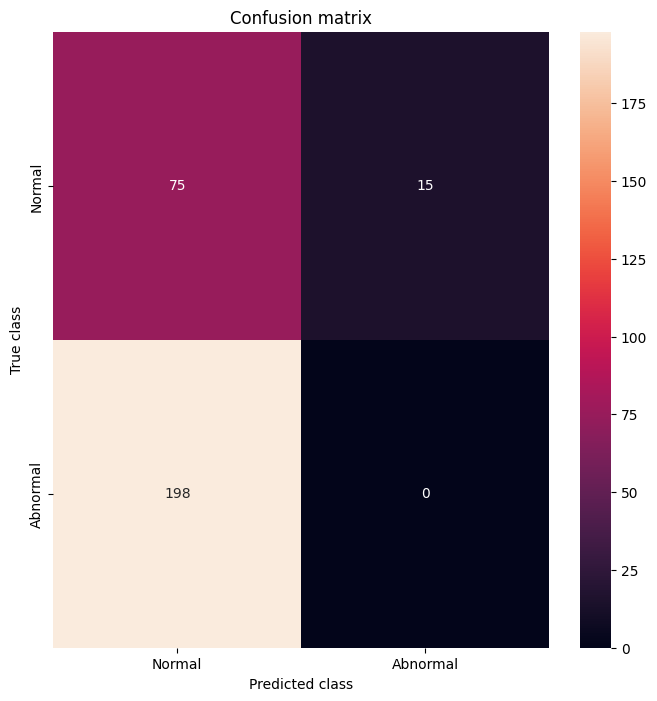

              precision    recall  f1-score   support

           0       0.27      0.83      0.41        90
           1       0.00      0.00      0.00       198

    accuracy                           0.26       288
   macro avg       0.14      0.42      0.21       288
weighted avg       0.09      0.26      0.13       288



In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))